# Training CONVNET

In [1]:
from packages import *
%matplotlib inline

/home/kaandonbekci/src/modules/utils.py:2: DeprecationWarning: Python2 support is deprecated and will be removed in a future release. Consider switching to Python3.
  import os, nilearn.plotting, nibabel
/home/kaandonbekci/.local/lib/python2.7/site-packages/nilearn/plotting/js_plotting_utils.py:14: ImportWarning: Not importing directory 'html': missing __init__.py
  from html import escape  # Unavailable in Py2
/usr/local/lib/python2.7/dist-packages/pandas/_libs/__init__.py:4: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .tslib import iNaT, NaT, Timestamp, Timedelta, OutOfBoundsDatetime
/usr/local/lib/python2.7/dist-packages/pandas/__init__.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import (hashtable as _hashtable,
/usr/local/lib/python2.7/dist-packages/pandas/core/dtypes/common.py:6: RuntimeWarning: numpy.dtype size changed, may indicate binar

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras import backend as K
K.set_floatx('float32')
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split

In [4]:
fresh = True

In [5]:
subject = 1
session = 1
epochs = 100
batch_size = 2
model_version = 'n-drop'
data_version = ['c', 'd']
label_version = 'c'

In [6]:
# ADDED IN UTILS.PY NOW
#######################
# def r2_keras(y_true, y_pred):
#     SS_res =  K.sum(K.square(y_true - y_pred)) 
#     SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
#     return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [7]:
if fresh:
    test_model = load_model(os.path.join(UNTRAINED_MODELS_DIR, 'sub-{}_mod-{}'.format(subject, model_version)))
else:
    test_model = load_model(os.path.join(TRAINED_MODELS_DIR, 
                            'sub-{}_mod-{}_data-{}_lab-{}'.format(subject, model_version, data_version, label_version)))
    

In [8]:
test_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
bold_input (InputLayer)         (None, 52, 43, 45, 1 0                                            
__________________________________________________________________________________________________
conv_1_1 (Conv3D)               (None, 52, 43, 45, 3 896         bold_input[0][0]                 
__________________________________________________________________________________________________
conv_1_2 (Conv3D)               (None, 52, 43, 45, 3 27680       conv_1_1[0][0]                   
__________________________________________________________________________________________________
conv_1_3 (Conv3D)               (None, 52, 43, 45, 3 27680       conv_1_2[0][0]                   
__________________________________________________________________________________________________
conv_1_4 (

In [9]:
X = {}
for v in data_version:
    X[v] = numpy_load('X_sub-{}_ses-{}_{}.npy'.format(subject, session, v), os.path.join(DATASET_X_DIR, v))
Y = numpy_load('Y_sub-{}_ses-{}_{}.npy'.format(subject, session, label_version), os.path.join(DATASET_Y_DIR, label_version))

In [10]:
X['c'] = np.expand_dims(X['c'], len(X['c'].shape))          

In [11]:
X_bold_train, X_bold_test, y_train, y_test = train_test_split(X['c'], Y, test_size=0.10, random_state=42)

In [12]:
X_voxel_train, X_voxel_test = train_test_split(X['d'], test_size=0.10, random_state=42)

In [13]:
if fresh:
    test_model.compile(optimizer = 'adam',
                  loss = 'mse',
                  metrics = ['mae', r2_keras])

In [14]:
Y.shape

(370, 7500)

In [31]:
test_model.fit([X_train], y_train, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/100
333/333 [==============================] - 21s 64ms/step - loss: 4873.2344 - mean_absolute_error: 59.0717 - r2_keras: -0.0407
Epoch 2/100
333/333 [==============================] - 13s 40ms/step - loss: 4818.3103 - mean_absolute_error: 58.7269 - r2_keras: -0.0204
Epoch 3/100
333/333 [==============================] - 13s 40ms/step - loss: 4735.4134 - mean_absolute_error: 58.1386 - r2_keras: -0.0120
Epoch 4/100
333/333 [==============================] - 13s 40ms/step - loss: 4668.4605 - mean_absolute_error: 57.6463 - r2_keras: 0.0086
Epoch 5/100
333/333 [==============================] - 13s 40ms/step - loss: 4596.8608 - mean_absolute_error: 57.0467 - r2_keras: 0.0185
Epoch 6/100
333/333 [==============================] - 13s 40ms/step - loss: 4545.8245 - mean_absolute_error: 56.5926 - r2_keras: 0.0286
Epoch 7/100
333/333 [==============================] - 13s 40ms/step - loss: 4494.7292 - mean_absolute_error: 56.1622 - r2_keras: 0.0339
Epoch 8/100
333/333 [=================

In [ ]:
train_loss = []
test_loss = []
for e in xrange(epochs):
    hist = test_model.fit([X_bold_train, X_voxel_train], y_train, epochs=1, batch_size=batch_size, verbose=1)
    train_loss.append(hist.history['loss'][0])
    Eval = test_model.evaluate([X_bold_test, X_voxel_test], y_test, batch_size=batch_size)
    print 'eval loss: {}'.format(Eval[0])
    test_loss.append(Eval[0])

Epoch 1/1
37/37 [==============================] - 3s 74ms/step
eval loss: 5171.82117029
Epoch 1/1
37/37 [==============================] - 3s 71ms/step
eval loss: 5157.77367504
Epoch 1/1
37/37 [==============================] - 3s 71ms/step
eval loss: 5137.01811919
Epoch 1/1
37/37 [==============================] - 3s 71ms/step
eval loss: 5145.09954339
Epoch 1/1
37/37 [==============================] - 3s 71ms/step
eval loss: 5144.11047033
Epoch 1/1
37/37 [==============================] - 3s 71ms/step
eval loss: 5142.95837732
Epoch 1/1
37/37 [==============================] - 3s 71ms/step
eval loss: 5273.1801098
Epoch 1/1
37/37 [==============================] - 3s 71ms/step
eval loss: 5162.04869616
Epoch 1/1
37/37 [==============================] - 3s 71ms/step
eval loss: 5152.62358794
Epoch 1/1
250/333 [=====================>........] - ETA: 29s - loss: 5221.5835 - mean_absolute_error: 58.7850 - r2_keras: -0.1170

In [15]:
epoch_series = np.arange(len(train_loss))

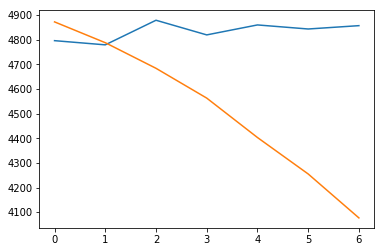

In [16]:
ax = plt.figure()
plt.plot(epoch_series, test_loss, epoch_series, train_loss)

In [62]:
metrics = test_model.evaluate(X_test, y_test, batch_size=batch_size)

37/37 [==============================] - 0s 4ms/step


In [63]:
metrics

[5240.400522592905, 60.59096908569336, -0.15193199144827352]

In [53]:
stim_index = 2
img_shape = (50,50,3)

In [54]:
Y = y_test

In [55]:
x_d = np.expand_dims(X_voxel_test[stim_index], 0)
x_c = np.expand_dims(X_bold_test[stim_index], 0)
# x_c.shape

# x_d.shape
y = Y[stim_index]
p = test_model.predict([x_c, x_d])
print y.shape, p.shape

(7500,) (1, 7500)


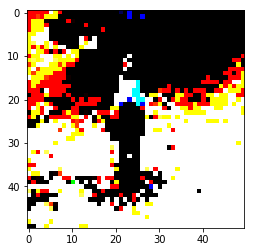

In [56]:
plt.imshow(y.reshape(img_shape))

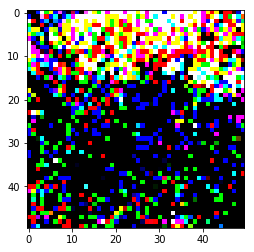

In [57]:
plt.imshow(p.reshape(img_shape))

Best so far model j

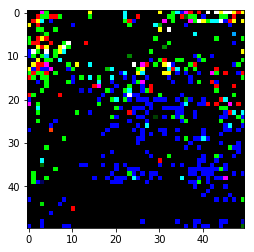

In [63]:
plt.imshow(p.reshape(img_shape))

In [64]:
'-'.join(['c'])

'c'

In [65]:
test_model.save(os.path.join(TRAINED_MODELS_DIR, 
                             'sub-{}_ses-{}_mod-{}_data-{}_lab-{}'.format(subject, 
                            session, model_version, '-'.join(data_version), label_version)))

In [ ]:
# X_batches = chunks(X, input_per_batch)
# Y_batches = chunks(Y, input_per_batch)
# for _ in xrange(epochs):
#     loss_list = []
#     accuracy_list = []
#     for i in range(len(X_batches)):
#         metrics = test_model.train_on_batch(X_batches[i], Y_batches[i])
#         loss_list.append(metrics[0])
#         accuracy_list.append(metrics[1])
#         print '*' ,
#     print 'epoch {}-loss:{}-acc:{}'.format(_, np.mean(loss_list), np.mean(accuracy_list))

In [13]:
def chunks(l, n):
    res = []
    for i in xrange(0, len(l), n):
        res.append(l[i:i+n])
    return res